In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
import joblib


In [312]:
data = pd.read_csv(r"C:\Users\user\Desktop\Github\Hotel booking prediction\hotel-booking-prediction\data\archive.zip")

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [314]:
# Null percent values

round(data.isna().sum()/data.shape[0]*100,4)

hotel                              0.0000
is_canceled                        0.0000
lead_time                          0.0000
arrival_date_year                  0.0000
arrival_date_month                 0.0000
arrival_date_week_number           0.0000
arrival_date_day_of_month          0.0000
stays_in_weekend_nights            0.0000
stays_in_week_nights               0.0000
adults                             0.0000
children                           0.0034
babies                             0.0000
meal                               0.0000
country                            0.4087
market_segment                     0.0000
distribution_channel               0.0000
is_repeated_guest                  0.0000
previous_cancellations             0.0000
previous_bookings_not_canceled     0.0000
reserved_room_type                 0.0000
assigned_room_type                 0.0000
booking_changes                    0.0000
deposit_type                       0.0000
agent                             

In [315]:
# Remove company and agent column (unneccesary IDs)

data = data.drop(columns=['company', 'agent'], axis=1)

In [316]:
data = data.dropna()

In [317]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


#### Some rows have 0 adults, children and babies which is impossible

In [318]:
filter = (data['adults']==0) & (data['children']==0) & (data['babies']==0)

In [319]:
data = data[~filter]

In [320]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [321]:
# Convert reservation_status_date to datetime

data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [322]:
# Extract date features
data['reservation_year'] = data['reservation_status_date'].dt.year
data['reservation_month'] = data['reservation_status_date'].dt.month
data['reservation_day'] = data['reservation_status_date'].dt.day
data['reservation_weekday'] = data['reservation_status_date'].dt.weekday

In [323]:
data.drop(columns=['reservation_status_date'], inplace=True)

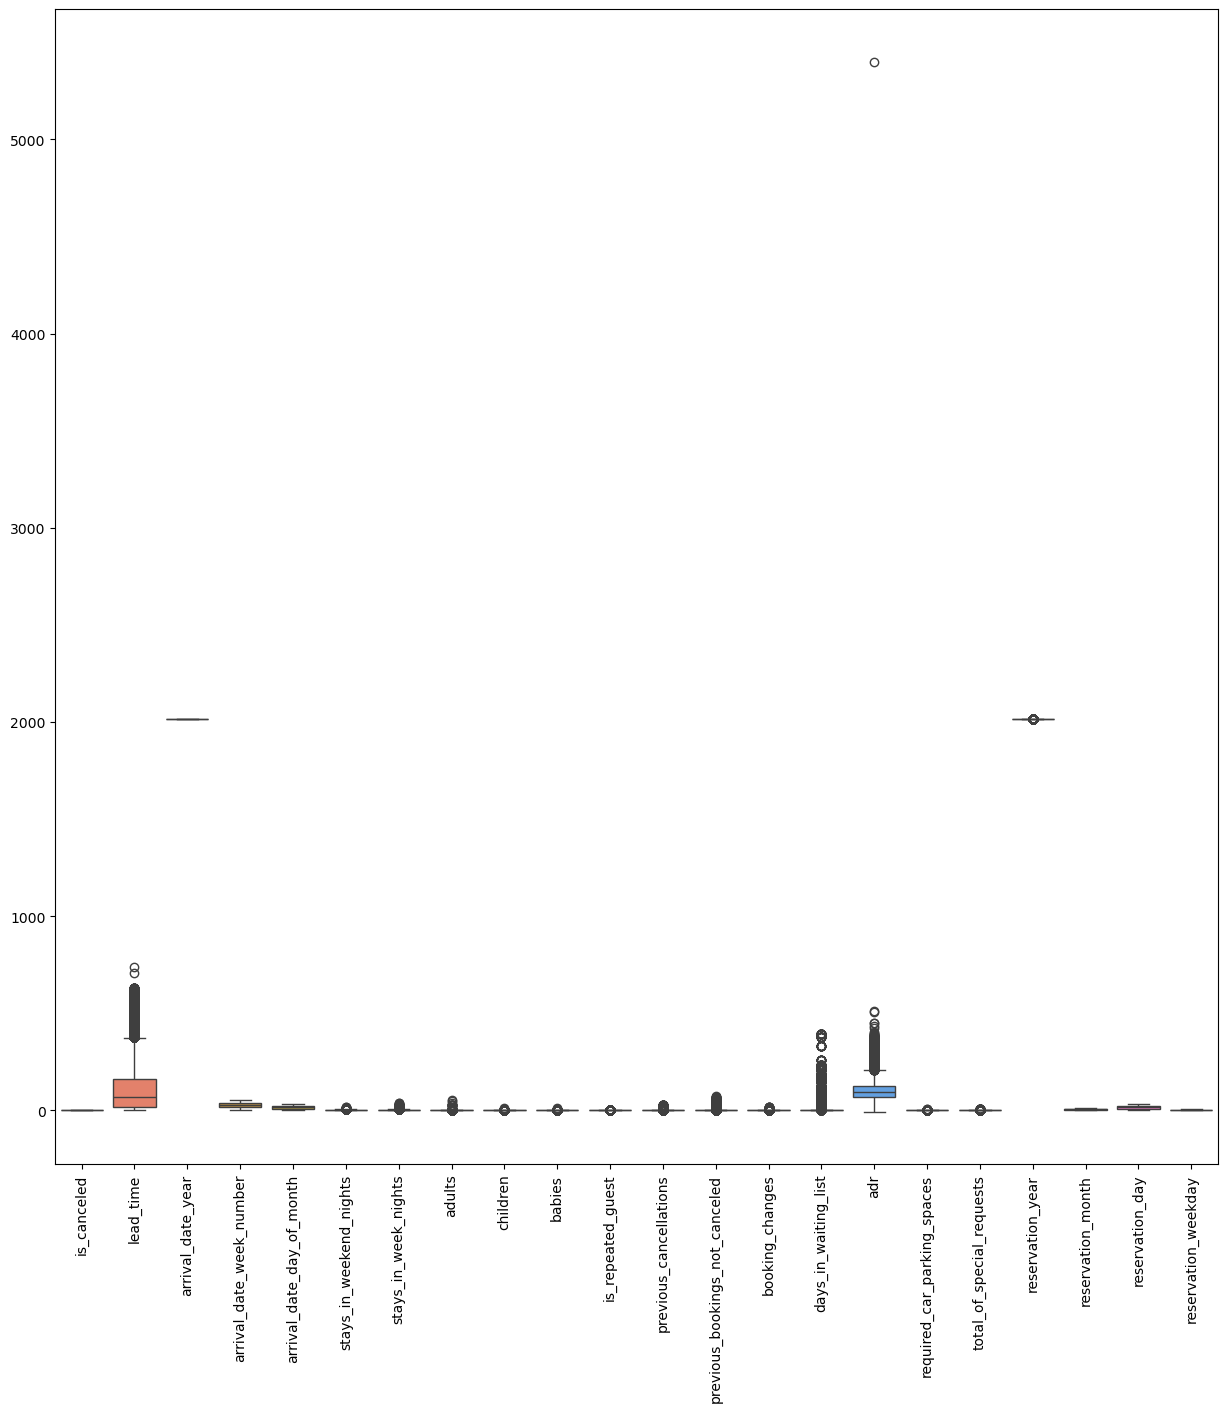

In [324]:
plt.figure(figsize=(15,15))
sns.boxplot(data)
plt.xticks(rotation=90)
plt.show()

#### We can see some outliers which will handle using IsolationForest

In [325]:
iforest = IsolationForest(n_estimators=50, contamination=0.1)
X = data.drop(columns=['is_canceled', 'adr'], axis=1)
y = data[['is_canceled', 'adr']]
pred_forest = iforest.fit_predict(X.select_dtypes(exclude='object'))
X['anomaly_label'] = pred_forest
X['anomaly_label'].value_counts()

anomaly_label
 1    106855
-1     11873
Name: count, dtype: int64

In [326]:
X_out = X[X['anomaly_label'] != -1] #remove the outliers from X
X_out = X_out.drop(columns='anomaly_label')

In [327]:
y_out = y.loc[X_out.index]
data_out = pd.concat([X_out, y_out], axis=1)

In [328]:
data_out.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_year,reservation_month,reservation_day,reservation_weekday,is_canceled,adr
2,Resort Hotel,7,2015,July,27,1,0,1,1,0.0,...,Transient,0,0,Check-Out,2015,7,2,3,0,75.0
3,Resort Hotel,13,2015,July,27,1,0,1,1,0.0,...,Transient,0,0,Check-Out,2015,7,2,3,0,75.0
4,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,Transient,0,1,Check-Out,2015,7,3,4,0,98.0
5,Resort Hotel,14,2015,July,27,1,0,2,2,0.0,...,Transient,0,1,Check-Out,2015,7,3,4,0,98.0
6,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,...,Transient,0,0,Check-Out,2015,7,3,4,0,107.0


<Axes: xlabel='is_canceled'>

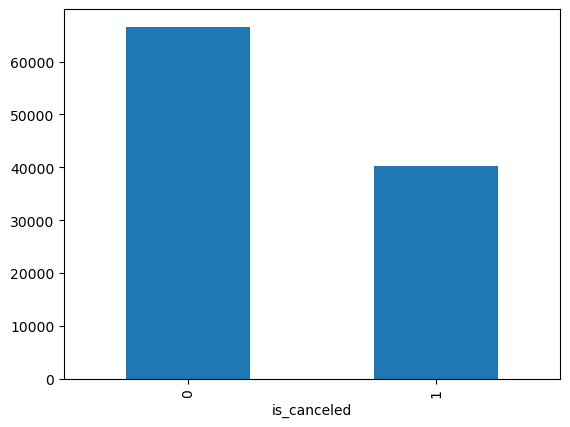

In [329]:
data_out['is_canceled'].value_counts().plot.bar()

#### Also we should balance these values (using SMOTE)

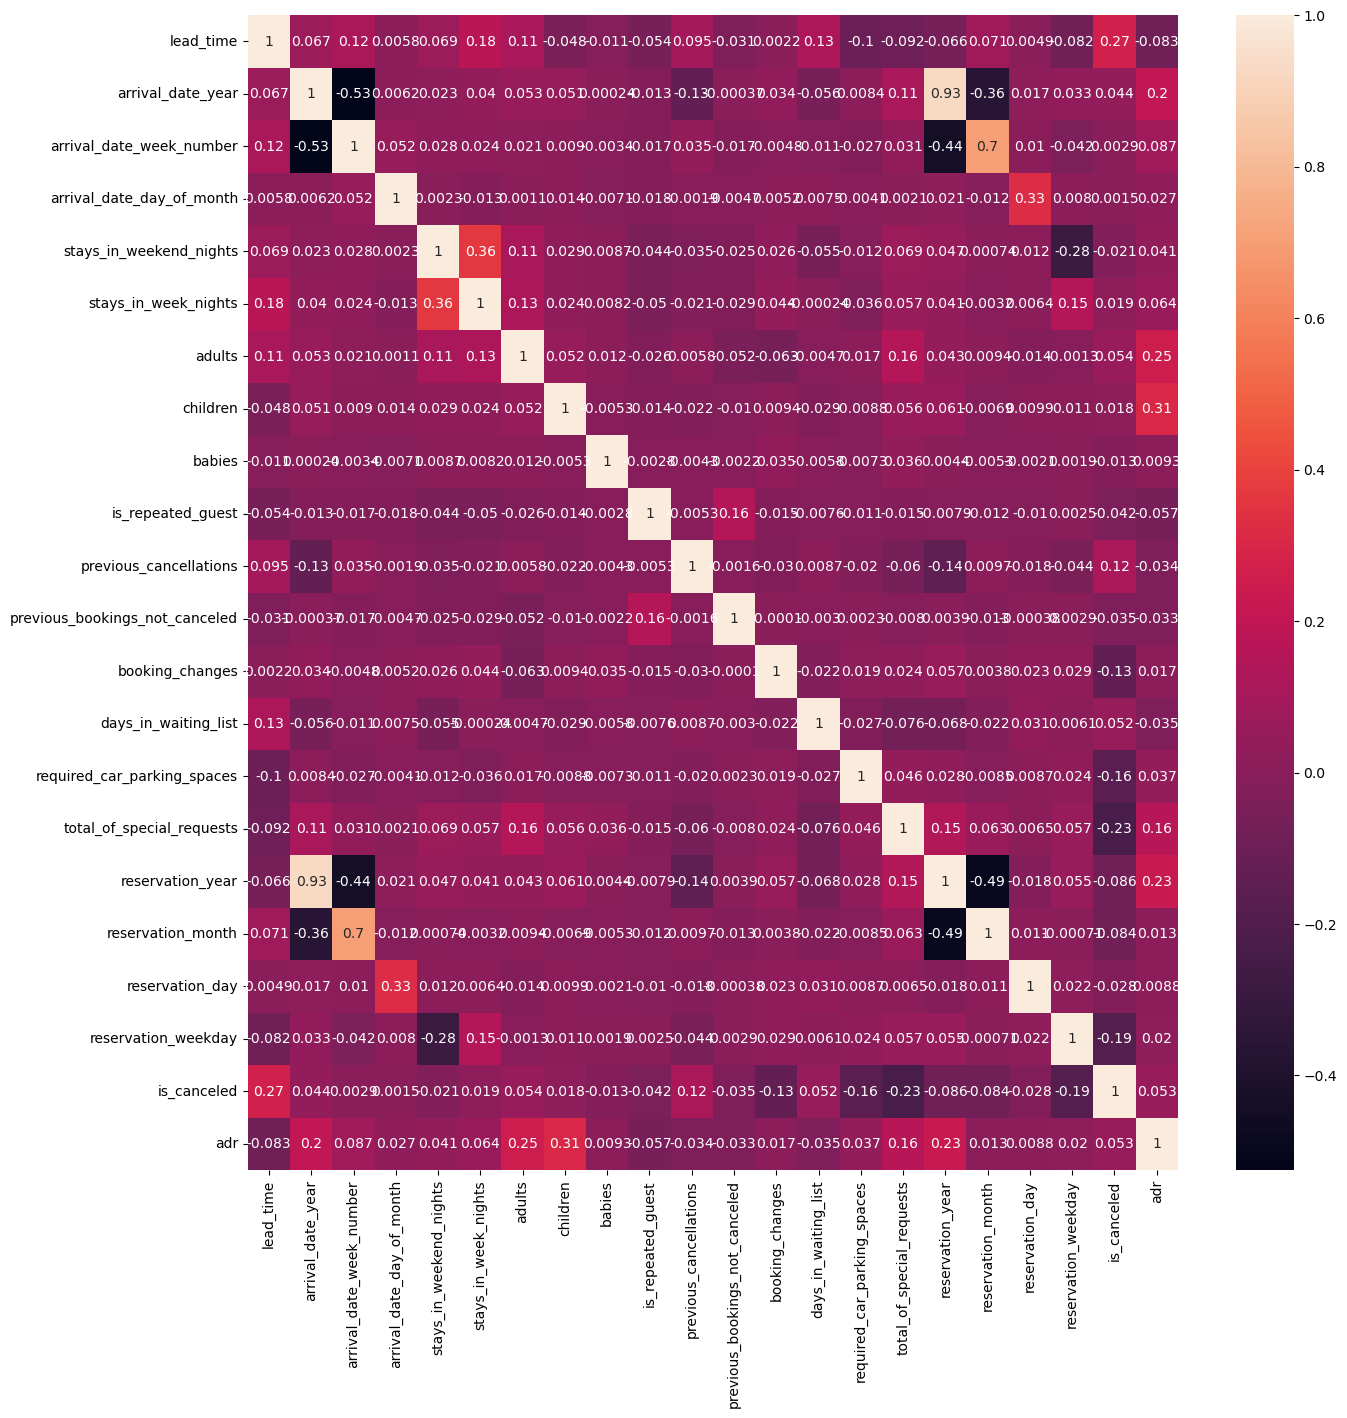

In [330]:
plt.figure(figsize=(15,15))
sns.heatmap(data_out.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

#### We can clearly see some high correlation between 'arrival_date_week_number' and 'reservation_month', 'arrival_date_year' and 'reservation_year', so I will remove 2 of them


In [331]:
useless_col = ['days_in_waiting_list', 'arrival_date_year', 'arrival_date_month', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list']

data_out.drop(useless_col, axis = 1, inplace = True)

In [332]:
data_out = data_out.drop(columns=['arrival_date_week_number'], axis=1)

In [333]:
# Export cleaned dataset

data_out.to_csv(r"C:\Users\user\Desktop\Github\Hotel booking prediction\hotel-booking-prediction\data\cleaned_data.csv", index=False)